# A/B Testing - Lab

## Introduction

In this lab, you'll go through a the process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate (with standard deviation .0475), which has outperformed numerous other templates in the past. The company is excited to test the new design that was developed internally, but nervous about losing sales if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template to in order to detect a 1% performance increase (or decrease).


## Step 1: State the Null Hypothesis, $H_0$

State your null hypothesis here (be sure to make it quantitative as before)

In [ ]:
# h_0 = New Template does not increase or decrease response rate from 5%

## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

In [ ]:
# h_1 = New template increases or decreases response rate by at least 1% 

## Step 3: Calculate n for standard alpha and power thresholds

Now define what alpha and beta you believe might be appropriate for this scenario.
To start, arbitrarily set alpha to 0.05. From this, calculate the required sample size to detect a .01 response rate difference at a power of .8.

> Note: Be sure to calculate a normalized effect size using Cohen's d from the raw response rate difference.

In [15]:
import scipy.stats as stats
import statsmodels
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

In [16]:
# alpha = 0.05, beta = (1 - 0.8) = 0.2, power = 0.8, standard div = .0475 mean diff = 0.1
alpha = 0.05
beta = 0.2
power = 0.8
std_dev = 0.0475
mean_dif1 = 0.01

cohen_d = mean_dif/std_dev




In [9]:
from statsmodels.stats.power import TTestIndPower

In [11]:
tester = TTestIndPower()
tester.solve_power(effect_size=cohen_d, alpha=alpha, power=power)

355.1427544342681

## Step 4: Plot Power Curves for Alternative Experiment Formulations

While you now know how many observations you need in order to run a t-test for the given formulation above, its worth exploring what sample sizes would be required for alternative test formulations. For example, how much does the required sample size increase if you put the more stringent criteria of $\alpha=.01$? Or what is the sample size required to detect a .03 response rate difference at the same $\alpha$ and power thresholds? To investigate this, plot power vs sample size curves for alpha values of .01, .05 and .1 along with varying response rate differences of .005, .01, .02 and .03.

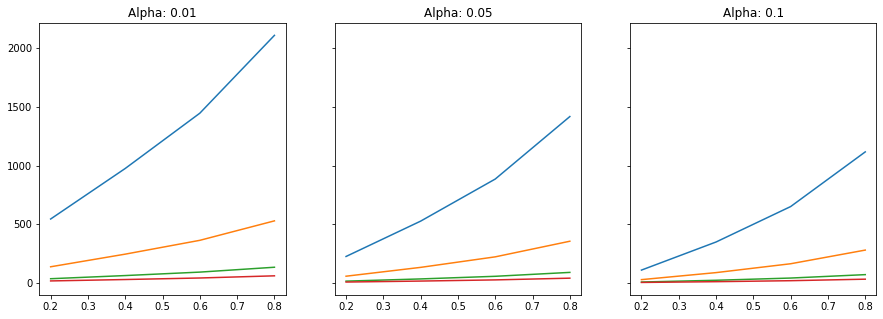

In [33]:
#Your code; plot power curves for the various alpha and effect size combinations
powers = [.2, .4, .6, .8]#power
mean_diffs = [.005, .01, .02, .03]
alphas = [.01, .05, .1]

fig, axs = plt.subplots(figsize=(15,5), nrows=1, ncols=3, sharey=True)



for ind, alpha in enumerate(alphas):
    for mean_dif in mean_diffs:
        nsamples = []
        for power in powers:
            cohen_d = mean_dif/std_dev
            tester.solve_power(effect_size=cohen_d, alpha=alpha, power=power)
            nsamples.append(tester.solve_power(effect_size=cohen_d, alpha=alpha, power=power))
        axs[ind].plot(powers, nsamples)
        axs[ind].set_title(f"Alpha: {alpha}")
    

#Add titles, colors, and FUN!!!!!!


## Step 5: Propose a Final Experimental Design

Finally, now that you've explored some of the various sample sizes required for statistical tests of varying power, effect size and type I errors, propose an experimental design to pitch to your boss and some of the accompanying advantages or disadvantages with it.

### Your answer here

In [ ]:
# Looking a at a mean difference of .005 is not a significant enough difference for business purposes
# Alpha .01 is too extreme for our business purpose

## Summary

In this lab, you practiced designing an initial experiment and then refined the parameters of the experiment based on an initial sample to determine feasibility.